In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/cars.csv")

In [10]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  259 non-null    float64
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 16.4+ KB


In [36]:
# convert weightlbs datatype to numeric

import pandas as pd
# Convert 'weightlbs' column to numeric, coercing errors to NaN
df[' weightlbs'] = pd.to_numeric(df[' weightlbs'], errors='coerce')

# Display info again to confirm the change
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  259 non-null    float64
 3    hp           261 non-null    int64  
 4    weightlbs    258 non-null    float64
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [34]:
df.describe()

,mpg,cylinders,cubicinches,hp,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,25.000000,1983.000000


In [11]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [12]:
df.tail()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.
260,22.0,6,250,105,3353,15,1977,US.


In [13]:
df.isnull().sum()

,0
mpg,0
cylinders,0
cubicinches,0
hp,0
weightlbs,0
time-to-60,0
year,0
brand,0


# **Is there an improvement in MPG over the years?**

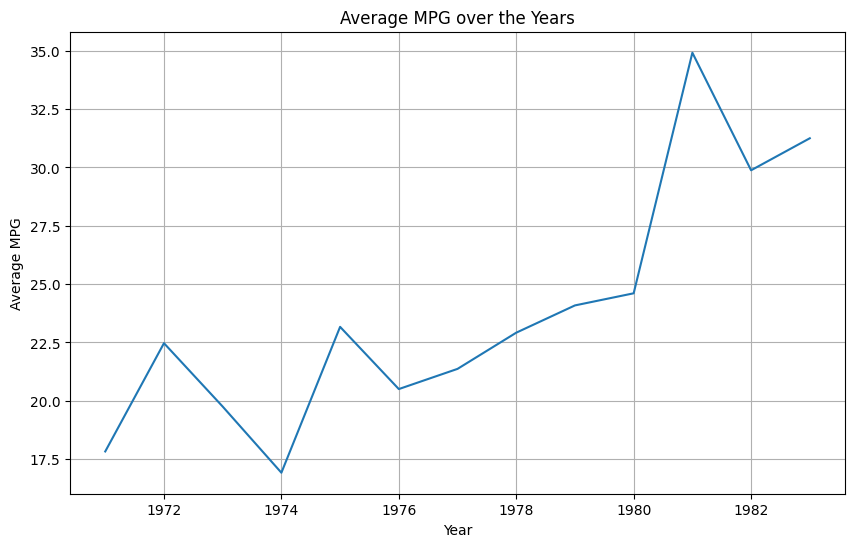

Correlation between year and mpg: 0.5504405303673507


In [21]:
# Calculate the average MPG for each year
avg_mpg_by_year = df.groupby(' year')['mpg'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_mpg_by_year.index, avg_mpg_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('Average MPG over the Years')
plt.grid(True)
plt.show()

# Calculate the correlation between year and mpg
correlation = df[' year'].corr(df['mpg'])
print(f"Correlation between year and mpg: {correlation}")


**Improvement in MPG over the years: Yes, the trend shows an increase in MPG over time, indicating improved fuel efficiency in vehicles.**

In [16]:
df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

# **Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?**




Correlation between cubicinches and time-to-60: -0.6131991064296582


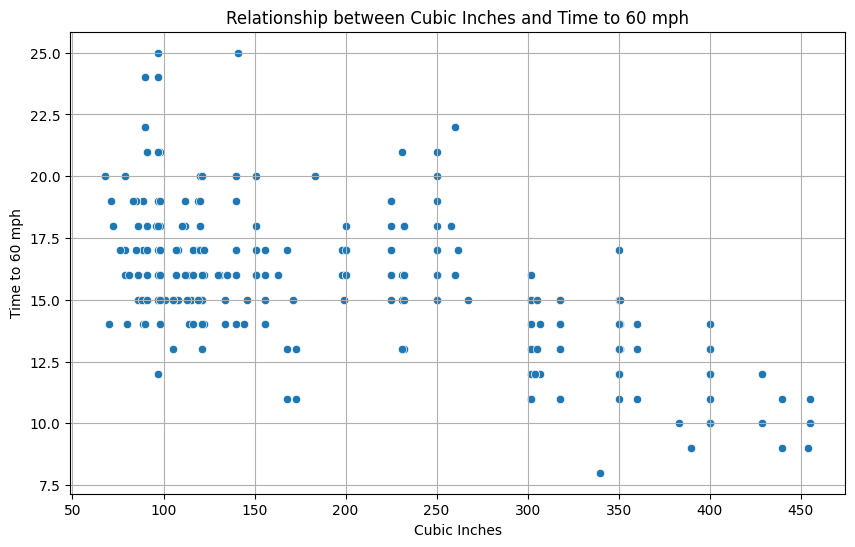

In [26]:
# Convert columns to numeric, handling errors
df[' cubicinches'] = pd.to_numeric(df[' cubicinches'], errors='coerce')
df[' time-to-60'] = pd.to_numeric(df[' time-to-60'], errors='coerce')
# Calculate the correlation between cubicinches and time-to-60
correlation = df[' cubicinches'].corr(df[' time-to-60'])
print(f"Correlation between cubicinches and time-to-60: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' cubicinches', y=' time-to-60', data=df)
plt.xlabel('Cubic Inches')
plt.ylabel('Time to 60 mph')
plt.title('Relationship between Cubic Inches and Time to 60 mph')
plt.grid(True)
plt.show()


**Effect of cubic inches on time-to-60 mph: There is a negative correlation, meaning vehicles with larger engines (higher cubic inches) generally reach 60 mph faster.**

# **Does a specific country prefer vehicles with more horse power ?**

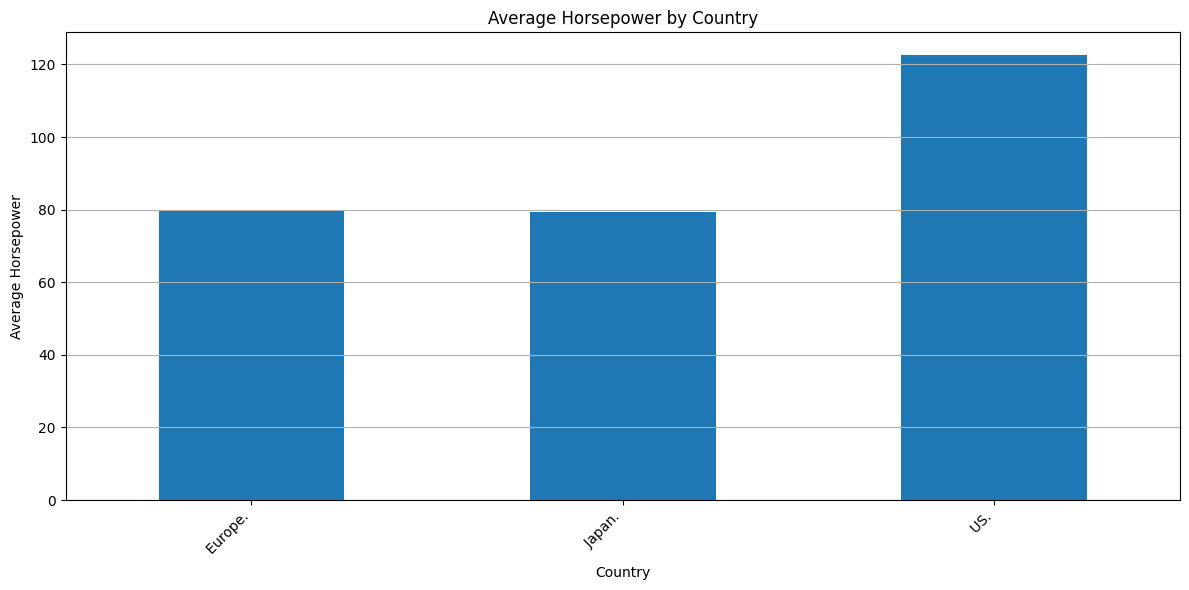

In [29]:
# Group data by country and calculate the average horsepower
avg_horsepower_by_country = df.groupby(' brand')[' hp'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
avg_horsepower_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Horsepower')
plt.title('Average Horsepower by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


**Horsepower preference by country: The US prefers vehicles with higher horsepower compared to Europe and Japan.**

# **How does the horse power affects the average of the vehicle ?**

Correlation between horsepower and mpg: -0.7749050346556694


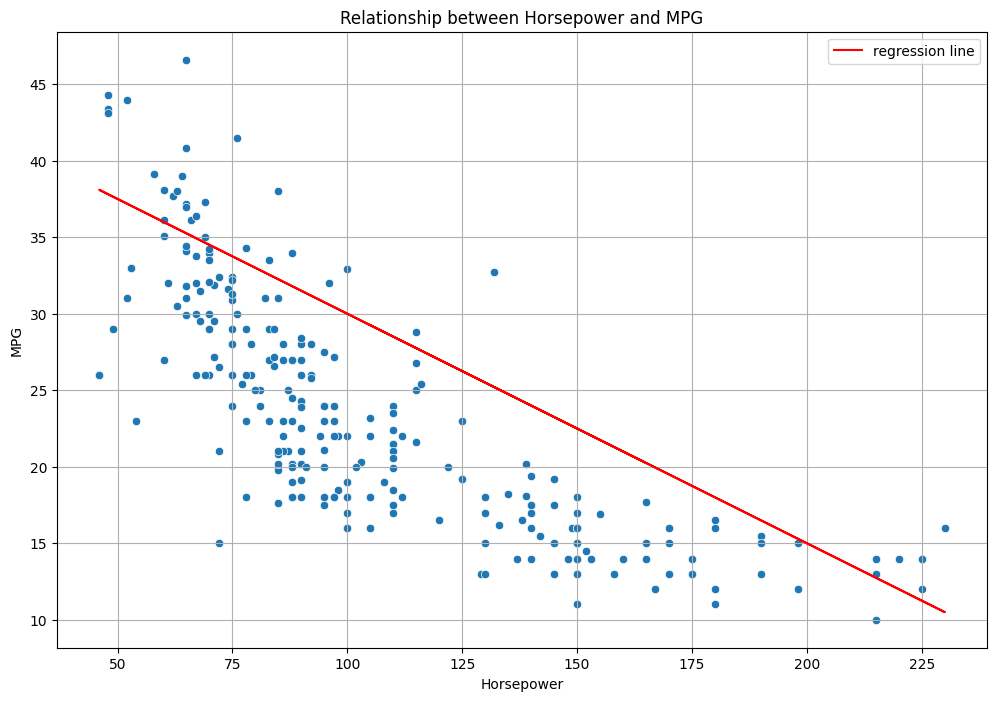

In [59]:
# Calculate the correlation between horsepower and mpg
correlation = df[' hp'].corr(df['mpg'])
print(f"Correlation between horsepower and mpg: {correlation}")
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(x=' hp', y='mpg', data=df)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between Horsepower and MPG')
plt.grid(True)

#Plot a line in this graph
plt.plot(df[' hp'], df[' hp'] * (-0.15) + 45, color='red', label='regression line') #Example line, adjust as needed

plt.legend() # Show the legend
plt.show()


**Effect of horsepower on MPG: There is a negative correlation; vehicles with higher horsepower tend to have lower MPG.**

# **How does the cubic inches affects the average of the vehicle ?**

Correlation between cubicinches and mpg: -0.803963576335497


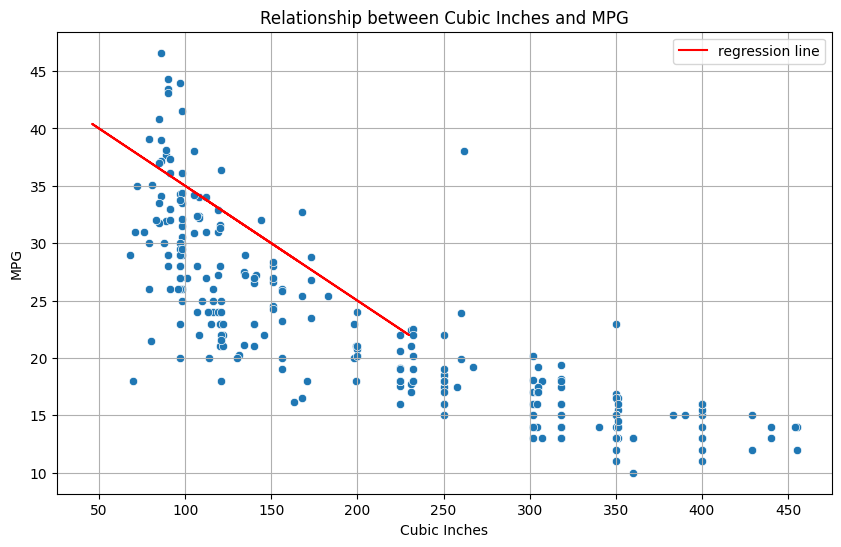

In [64]:
#How does the cubic inches affects the average of the vehicle ?

# Calculate the correlation between cubicinches and mpg
correlation = df[' cubicinches'].corr(df['mpg'])
print(f"Correlation between cubicinches and mpg: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' cubicinches', y='mpg', data=df)
plt.xlabel('Cubic Inches')
plt.ylabel('MPG')
plt.title('Relationship between Cubic Inches and MPG')
plt.grid(True)

#Plot a line in this graph
plt.plot(df[' hp'], df[' hp'] * (-0.10) + 45, color='red', label='regression line') #Example line, adjust as needed

plt.legend() # Show the legend
plt.show()

**A negative correlation suggests that larger cubic inches (engine size) tend to be associated with lower MPG**

# **What is the effect of number of cylinders on the mpg ?**

Correlation between cylinders and mpg: -0.7767098829879999


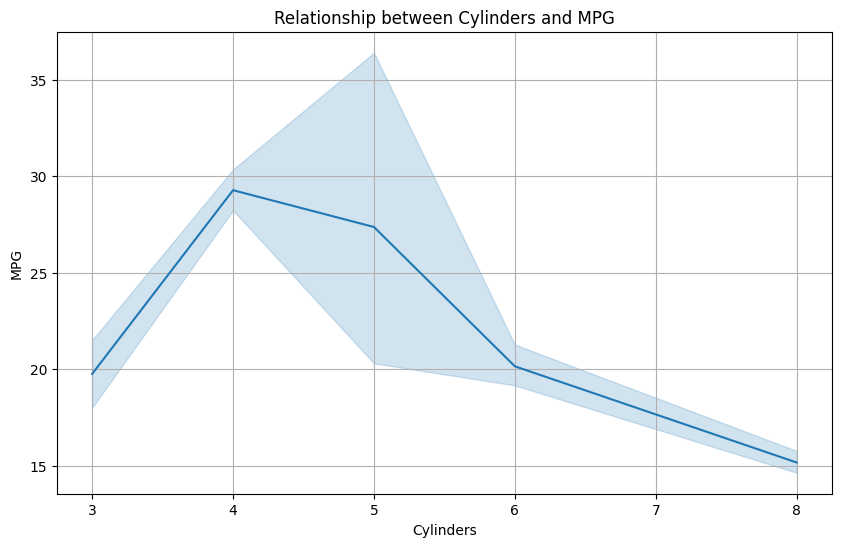

In [51]:
# What is the effect of number of cylinders on the mpg ?

import matplotlib.pyplot as plt
# Calculate the correlation between cylinders and mpg
correlation = df[' cylinders'].corr(df['mpg'])
print(f"Correlation between cylinders and mpg: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(x=' cylinders', y='mpg', data=df)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Relationship between Cylinders and MPG')
plt.grid(True)
plt.show()


**Effect of the number of cylinders on MPG: Vehicles with more cylinders generally have lower MPG.**

# **What relation between cubic inches , number of cylinders and horse power you can observe from the data ?**

             cubicinches  cylinders        hp
cubicinches     1.000000   0.951452  0.906902
cylinders       0.951452   1.000000  0.845155
hp              0.906902   0.845155  1.000000


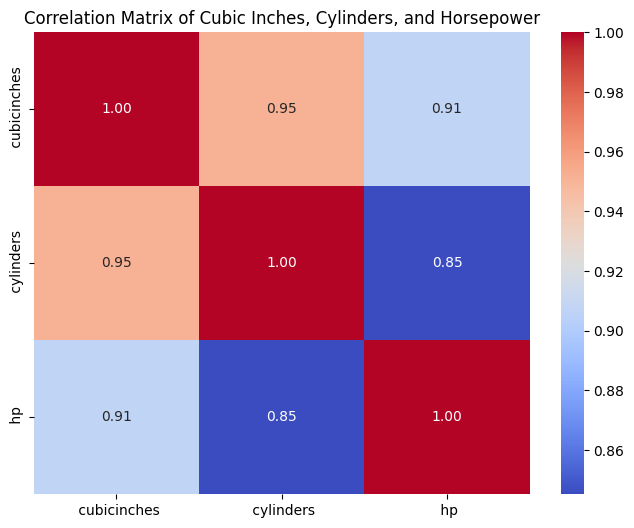

In [52]:
# What relation between cubic inches , number of cylinders and horse power you can observe from the data ?

# Calculate the correlation matrix for 'cubicinches', 'cylinders', and 'hp'
correlation_matrix = df[[' cubicinches', ' cylinders', ' hp']].corr()

print(correlation_matrix)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Cubic Inches, Cylinders, and Horsepower')
plt.show()


**Relationship between cubic inches, cylinders, and horsepower: Strong positive correlations were observed:**

Larger engines (more cubic inches) tend to have more horsepower.

Vehicles with more cylinders generally have higher horsepower.

More cylinders are associated with larger engine displacement.


#**How much proportion of the total records is occupied by vehicles with 8 cylinders ?**


Proportion of vehicles with 8 cylinders: 0.29118773946360155
Number of vehicles with 8 cylinders: 76


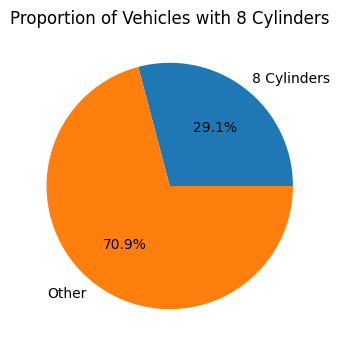

In [58]:
# How much proportion of the total records is occupied by vehicles with 8 cylinders ?

# Calculate the proportion of vehicles with 8 cylinders
eight_cylinder_proportion = (df[' cylinders'] == 8).sum() / len(df)
print(f"Proportion of vehicles with 8 cylinders: {eight_cylinder_proportion}")

# Calculate and print the number of vehicles with 8 cylinders
eight_cylinder_count = (df[' cylinders'] == 8).sum()
print(f"Number of vehicles with 8 cylinders: {eight_cylinder_count}")

# Create a pie chart to visualize the proportion
plt.figure(figsize=(6, 4))
plt.pie([eight_cylinder_proportion, 1 - eight_cylinder_proportion],
        labels=['8 Cylinders', 'Other'],
        autopct='%1.1f%%')
plt.title('Proportion of Vehicles with 8 Cylinders')
plt.show()

**Proportion of vehicles with 8 cylinders: About 29.1% of the total records belong to vehicles with 8 cylinders.**